# Part I - (FORD GOBIKE SYSTEM  DATA INVESTIGATION)
## by (Richard Owusu)

## Introduction
> Ford GoBike system data is a data about a bike rental company.This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.The data set contains 183412 rows and 16 columns, the data set set contains few null values(8460) or entries and no duplicate


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.sample(100)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
75902,1214,2019-02-19 08:32:20.6860,2019-02-19 08:52:35.5680,109.0,17th St at Valencia St,37.763316,-122.421904,27.0,Beale St at Harrison St,37.788059,-122.391865,2225,Subscriber,1975.0,Male,No
100383,730,2019-02-14 18:21:54.9810,2019-02-14 18:34:05.2810,176.0,MacArthur BART Station,37.828410,-122.266315,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,4680,Subscriber,1976.0,Female,No
86982,1133,2019-02-17 11:02:09.8670,2019-02-17 11:21:03.7070,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,112.0,Harrison St at 17th St,37.763847,-122.413004,4742,Customer,1978.0,Male,No
3948,244,2019-02-28 16:46:39.9490,2019-02-28 16:50:44.2300,33.0,Golden Gate Ave at Hyde St,37.781650,-122.415408,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,6488,Subscriber,1987.0,Male,No
140213,606,2019-02-07 19:20:54.2390,2019-02-07 19:31:00.6510,323.0,Broadway at Kearny,37.798014,-122.405950,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,5368,Subscriber,1984.0,Male,No
48021,236,2019-02-22 08:21:48.9650,2019-02-22 08:25:45.5570,131.0,22nd St at Dolores St,37.755000,-122.425728,386.0,24th St at Bartlett St,37.752105,-122.419724,6225,Subscriber,1987.0,Male,Yes
159239,904,2019-02-05 18:02:29.9600,2019-02-05 18:17:34.5100,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,109.0,17th St at Valencia St,37.763316,-122.421904,5108,Subscriber,1990.0,Male,No
74289,355,2019-02-19 10:57:10.5170,2019-02-19 11:03:05.8950,47.0,4th St at Harrison St,37.780955,-122.399749,19.0,Post St at Kearny St,37.788975,-122.403452,5857,Subscriber,1992.0,Male,No
73989,538,2019-02-19 11:56:34.7580,2019-02-19 12:05:33.4550,58.0,Market St at 10th St,37.776619,-122.417385,47.0,4th St at Harrison St,37.780955,-122.399749,5870,Subscriber,1989.0,Male,No
115679,331,2019-02-12 08:32:50.0980,2019-02-12 08:38:21.6500,245.0,Downtown Berkeley BART,37.870139,-122.268422,243.0,Bancroft Way at College Ave,37.869360,-122.254337,4895,Subscriber,1989.0,Male,No


In [3]:
# code to check the number of null values
df.isnull().any(axis=1).sum()   

8460

In [3]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
df.member_birth_year.nunique()

75


> The data set contains 183412 rows and 16 columns, the data set set contains few null values(8460) or entries and no duplicat
> the data contains columns such as trip duration,gender type and usertype which are the main features of interest in the data set.Due to the large data set i would create a new column(age group) which group the ages of the users into five categories to enable easy investigation between age group and trip duration.
> gender type, usertype  and bike share for all trip column contains categorical data set, member birth year is a discrete  quantitative data set and trip duration being continuous data set. This makes it easy to draw relationships between these columns or variables 

# DATA WRANGLING
### i will perform the following cleanup of the data set to enable easy analysis of the data
##### 1.delete null rows since they are very few and has little impact on the analysis.
#### 2.convert member birth year data type to integer.
#### 3.limit the user birth year to less than 1900(the maximum year is 2001 and minimum year is 1878, its not common for people older than 100 years to ride a bicycle)  
#### 4.create a new column(age group) which group the ages of the users into seven categories to enable easy investigation between age group and trip duration. The ages are grouped from very_young_age, middle_young_age,young_age,middle_age,middle_old age,old_age and very_old age which is the increasing order of the ages of the users.


In [6]:
# code tp drop null vallues
df=df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [8]:
#code to reste axis
df.reset_index(drop=True,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 21.4+ MB


In [10]:
# code to change member birth year data type to int
df['member_birth_year']=df['member_birth_year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(6), int64(3), object(7)
memory usage: 21.4+ MB


In [11]:
df.member_birth_year.describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(6), int64(3), object(7)
memory usage: 21.4+ MB


In [13]:
#code to cut off member birth year less than 1900
df=df[df['member_birth_year']>1900]

In [14]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174898.000000,174898.000000,174898.000000,174898.000000,174898.000000,174898.000000,174898.000000,174898.000000,174898.000000
mean,704.001475,138.974905,37.771208,-122.351764,136.593334,37.771402,-122.351340,4482.503734,1984.829443
std,1642.431965,111.637419,0.100403,0.117741,111.332463,0.100307,0.117304,1659.232923,10.008752
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1901.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [15]:
#code to reset index
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174898 entries, 0 to 174897
Data columns (total 16 columns):
duration_sec               174898 non-null int64
start_time                 174898 non-null object
end_time                   174898 non-null object
start_station_id           174898 non-null float64
start_station_name         174898 non-null object
start_station_latitude     174898 non-null float64
start_station_longitude    174898 non-null float64
end_station_id             174898 non-null float64
end_station_name           174898 non-null object
end_station_latitude       174898 non-null float64
end_station_longitude      174898 non-null float64
bike_id                    174898 non-null int64
user_type                  174898 non-null object
member_birth_year          174898 non-null int64
member_gender              174898 non-null object
bike_share_for_all_trip    174898 non-null object
dtypes: float64(6), int64(3), object(7)
memory usage: 21.3+ MB


In [17]:
# code to create the birth year inervals
birth_year_intervals=[1900,1910,1925,1940,1955,1970,1985,2002]
# code to name the intervals
interval_name=['very_old_age','old_age','middle_old_age','middle_age','middle_young_age','young_age','very_young_age']
# code to create age group column
df['age_group']=pd.cut(df['member_birth_year'],birth_year_intervals,labels=interval_name,right=False)


In [18]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age_group
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,young_age
1,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,young_age
2,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,very_young_age
3,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,young_age
4,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,middle_young_age
5,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,young_age
6,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989,Male,No,very_young_age
7,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988,Other,No,very_young_age
8,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,very_young_age
9,458,2019-02-28 23:57:57.2110,2019-03-01 00:05:35.4350,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996,Female,Yes,very_young_age


## Univariate Exploration

In [20]:
# to count the total age group for each category
df.age_group.value_counts().sort_index()

very_old_age            17
old_age                  4
middle_old_age         128
middle_age            1477
middle_young_age     14587
young_age            51218
very_young_age      107467
Name: age_group, dtype: int64

In [35]:
interval_order=interval_name[::-1]
interval_order

['very_young_age',
 'young_age',
 'middle_young_age',
 'middle_age',
 'middle_old_age',
 'old_age',
 'very_old_age']

In [41]:
# code to create a function that  can plot univariate categorical variables for the data
def uni_count_plot(df,x_var,order=None):
    plt.figure(figsize=(10,10))
    sb.countplot(data=df,x=x_var,color = sb.color_palette()[0],order=order,log=True)
    x_var=x_var.replace('_',' ')
    plt.title(f'''total number of each {x_var}'''.title(),fontsize=14,weight='bold')
    plt.xlabel(x_var.title(),fontsize=14,weight='bold')
    plt.ylabel('total number',fontsize=14,weight='bold')

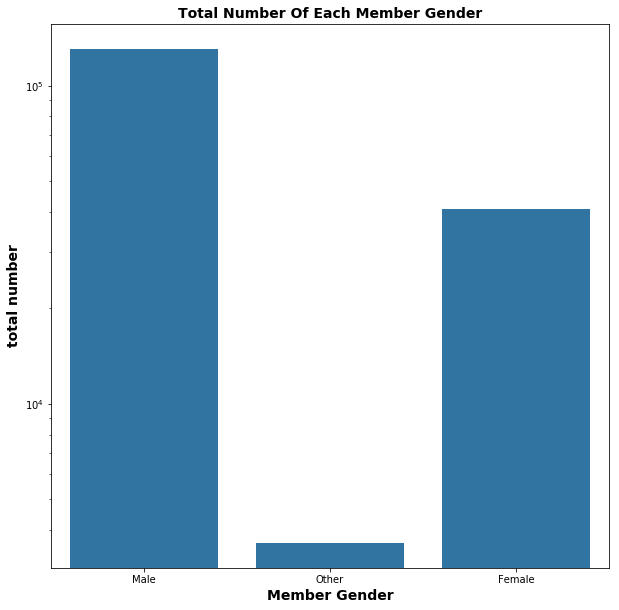

In [42]:
# code to call count function
uni_count_plot(df,'member_gender')

The bar graph above shows the total males,females and othe gender type in the data set,.It clearly shows that there were more males than females and other gender type in the data set 

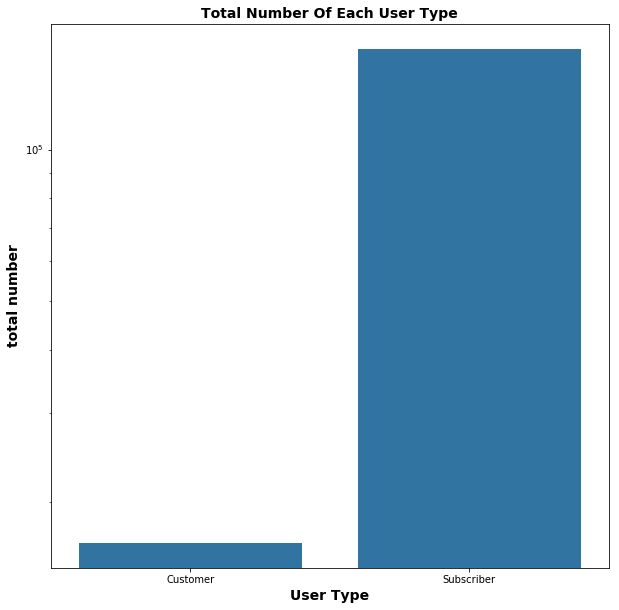

In [44]:
uni_count_plot(df,'user_type')

The bar plot above shows there are more subsciber user type than customer user type

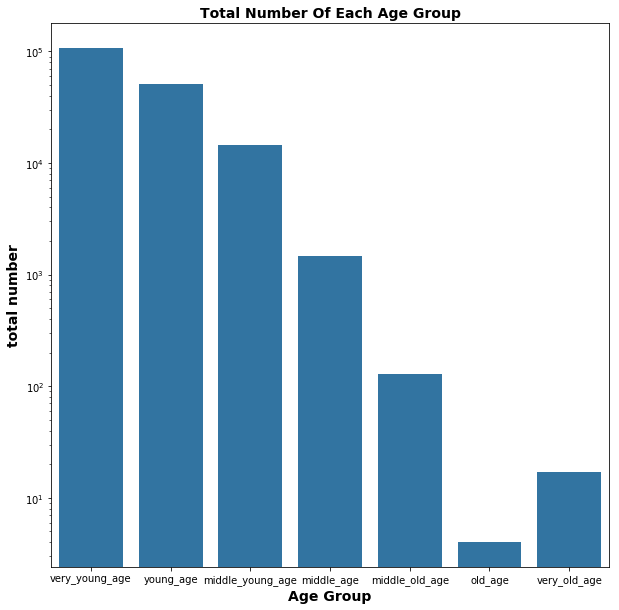

In [45]:
uni_count_plot(df,'age_group',interval_order)

The bar chart shows is a plot of the total number of each age group in the data, it shows a decrease in the total number of the of each age group from very young age group to very old age group,however, very old age group is higher than old age group

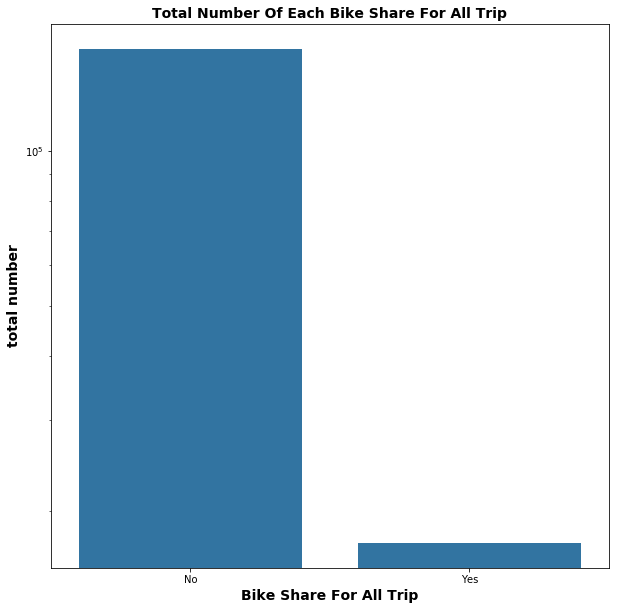

In [48]:
uni_count_plot(df,'bike_share_for_all_trip')

The bar graph shows that most of the bike share was not for all trips

Text(0,0.5,'total number')

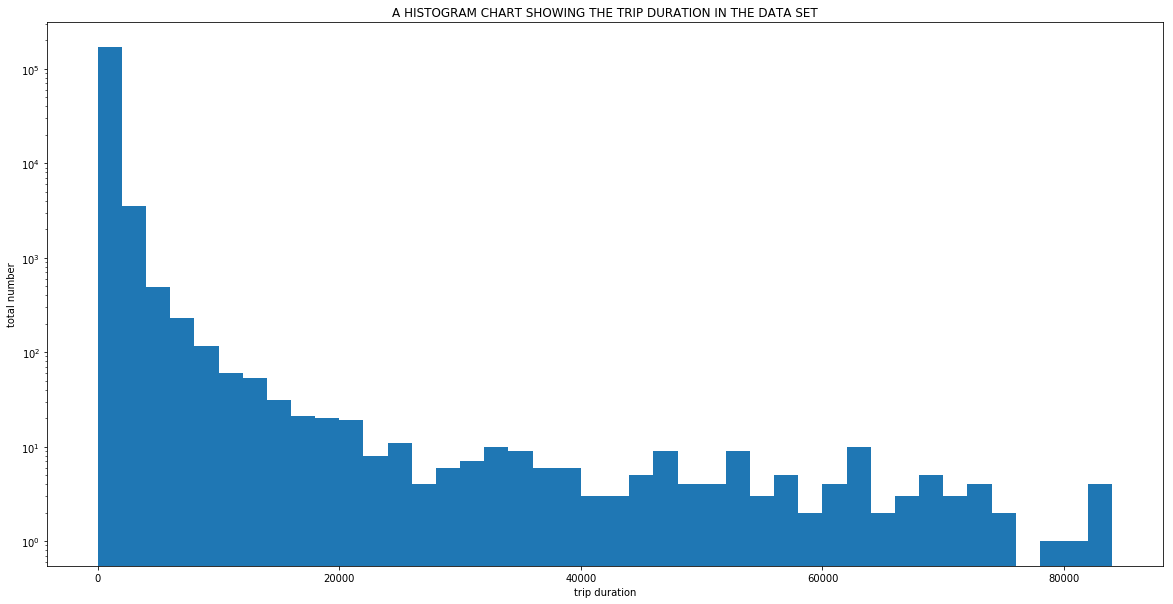

In [47]:
# code to histogram of trip duration
plt.figure(figsize = [20, 10])
bins = np.arange(0, df['duration_sec'].max()+1000, 2000)
plt.hist(data = df, x = 'duration_sec', bins = bins,log=True)
plt.title('A HISTOGRAM CHART SHOWING THE TRIP DURATION IN THE DATA SET')
plt.xlabel('trip duration')
plt.ylabel('total number')

the histogram above shows that there more short trip duarion in the data set and it decreases as as the trip duration increases or its skewed to the right.

## summary of insights after univariate exploration
> 1.There were more males than females in the data set
>  2.The subscriber usertype was more than the customer user type
>  3.the trip for most people were not for all journey.
>  4.the the birth year group which was common was the very young age(1985 to 2002), meaning young people comparatevely rented      the bikes, i used log scale for the axis due to the large number of the data set.
> 5.Most of the bike trips were for a short duration as seen from the trip duration histogram plot the trip duration was mostly from 0 to 20000 in seconds.
  


> i performed the following wrangling on the data set
>1.delete null rows since they are very few and has little impact on the analysis.
>2.convert member birth year to integer.
>3.limit the user birth year to less than 1900(the maximum year is 2001 and minimum year is 1878, its not common for people       older than 100 years to ride a bicycle)
>4.create a new column(age group) which group the ages of the users into seven categories to enable easy investigation between    age group and trip duration. The ages are grouped from very_young_age, middle_young_age,young_age,middle_age,middle_old        age,old_age and very_old age which is the increasing order of the ages of the users.¶

## Bivariate Exploration


Text(4.04852,0.5,'total count')

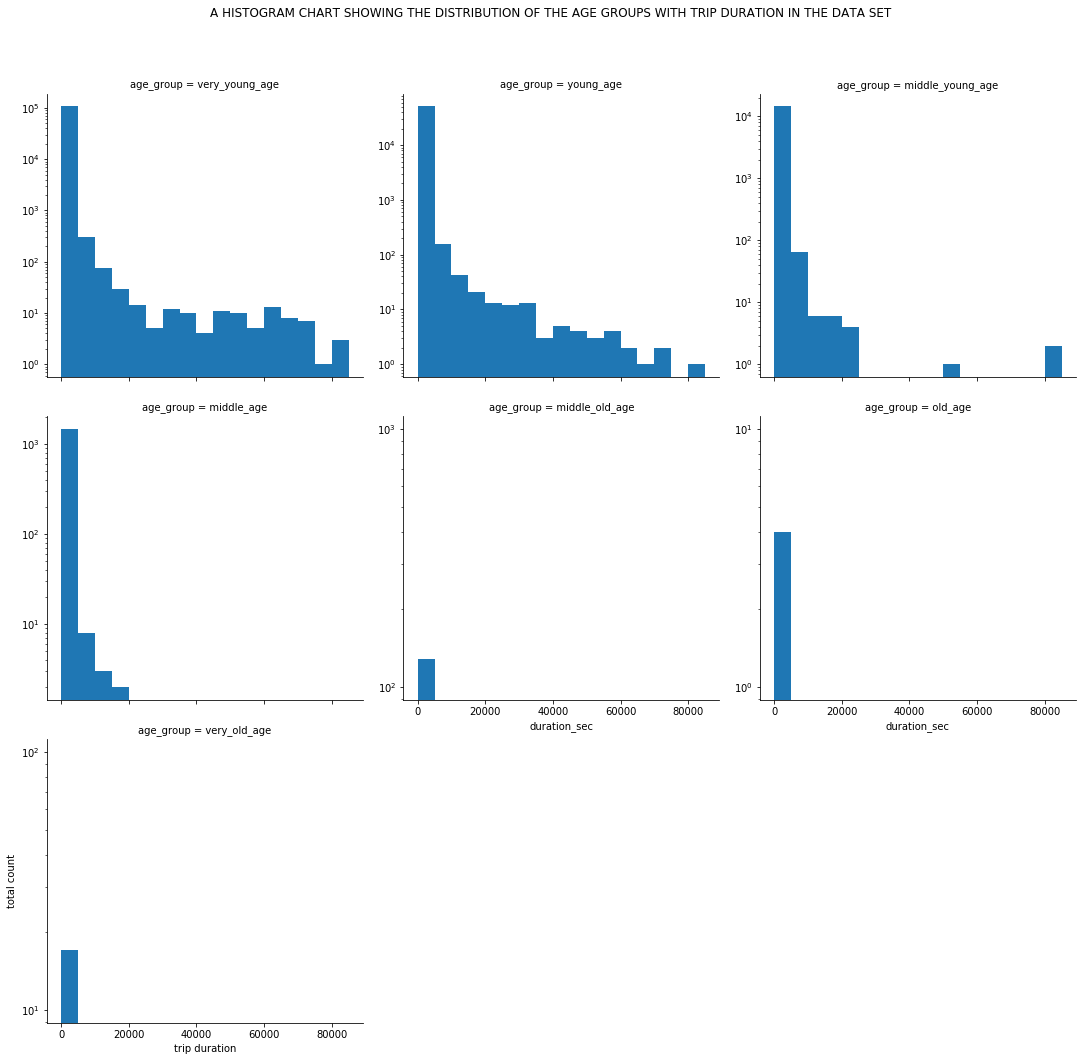

In [52]:
# code to plot age groups with trip duration
bins = np.arange(0, df['duration_sec'].max()+1000, 5000)
age_order = interval_order
gclasses = pd.api.types.CategoricalDtype(ordered=True, categories=age_order)
df['age_group'] = df['age_group'].astype(gclasses);
g = sb.FacetGrid(data = df, col = 'age_group',col_wrap=3,sharey=False,size=5)
g.map(plt.hist, 'duration_sec',log=True,bins=bins)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('A HISTOGRAM CHART SHOWING THE DISTRIBUTION OF THE AGE GROUPS WITH TRIP DURATION IN THE DATA SET')
plt.xlabel('trip duration')
plt.ylabel('total count')




The faceted histogram plot above is a plot of age group against trip duration, it shows that very young age group has higher total number of trip duration and middle old age group contains small total number of trip duration

Text(0,0.5,'trip duration(seconds)')

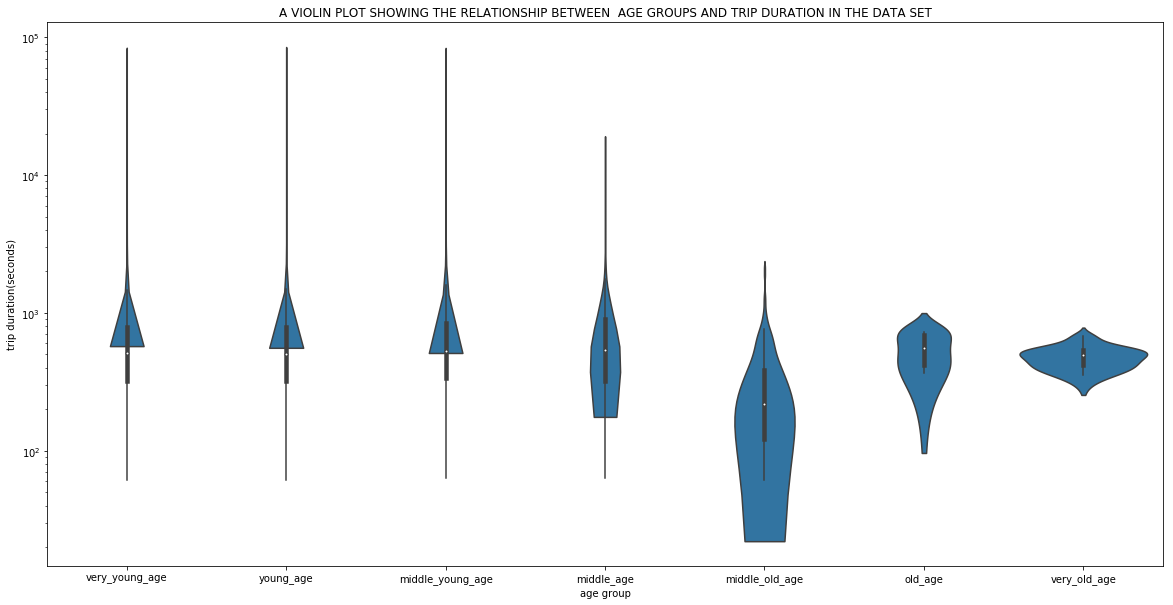

In [53]:
#code to create a violin plot of age group and trip duration
plt.figure(figsize = [20, 10])
v_age = interval_order
v_age_1 = pd.api.types.CategoricalDtype(ordered=True, categories=v_age)
base_color = sb.color_palette()[0]
df['age_group'] = df['age_group'].astype(v_age_1);
sb.violinplot(data=df, x='age_group', y='duration_sec',log=True,color=base_color);
plt.yscale('log')
plt.title('A VIOLIN PLOT SHOWING THE RELATIONSHIP BETWEEN  AGE GROUPS AND TRIP DURATION IN THE DATA SET')
plt.xlabel('age group')
plt.ylabel('trip duration(seconds)')


The violin plot above shows the  relationship between age group and trip duration, it can be seen that thethe median trip duration was the almost the same for the age group except the middle age group

Text(0,0.5,'trip duration(seconds)')

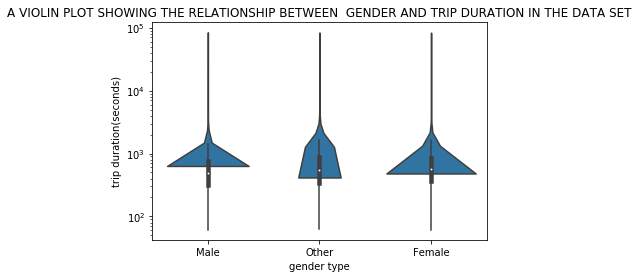

In [55]:
# code create a violin plot of gender type and trip duration
sb.violinplot(data=df, x='member_gender', y='duration_sec',log=True,color = sb.color_palette()[0]);
plt.yscale('log')
plt.title('A VIOLIN PLOT SHOWING THE RELATIONSHIP BETWEEN  GENDER AND TRIP DURATION IN THE DATA SET')
plt.xlabel('gender type')
plt.ylabel('trip duration(seconds)')

The violin plot above shows is a plot of gender type agains trip duration, it reveals that the mediam trip duration was the same for al gender type

Text(716.63,0.5,'trip duration(seconds)')

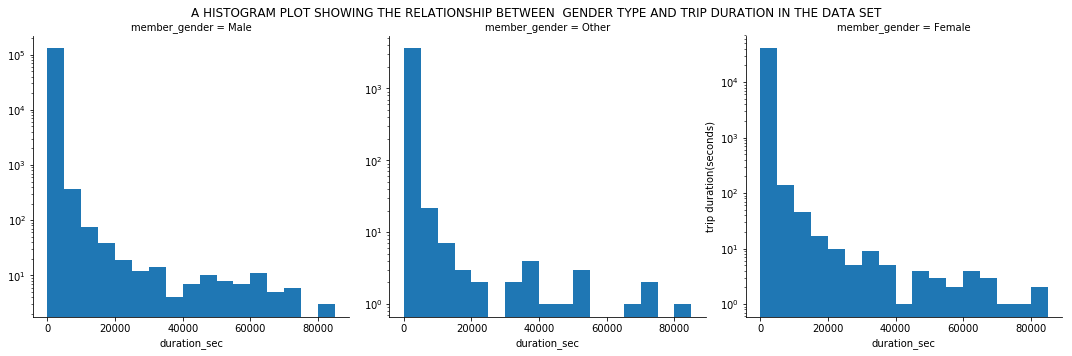

In [56]:
# code to plot a histogram of gender type and trip duration
g = sb.FacetGrid(data = df, col = 'member_gender',col_wrap=3, sharey=False,size=5)
g.map(plt.hist, 'duration_sec',log=True,bins=bins)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('A HISTOGRAM PLOT SHOWING THE RELATIONSHIP BETWEEN  GENDER TYPE AND TRIP DURATION IN THE DATA SET')
plt.ylabel('trip duration(seconds)')

the histogram above is a plot of the gender type against trip duration, it reveals that the male gender group enjoyed saw a high trip duration followed by female gender group

Text(0,0.5,'trip duration(seconds)')

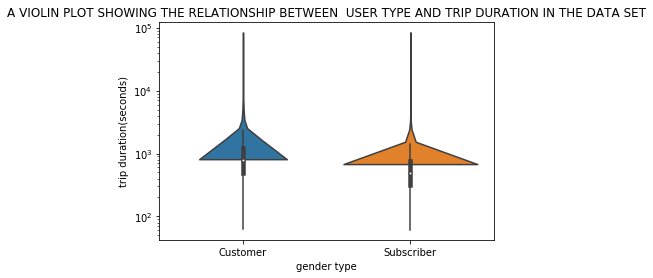

In [57]:
# code to plot a ciolin plot of user type and trip duration
sb.violinplot(data=df, x='user_type', y='duration_sec',log=True);
plt.yscale('log')
plt.title('A VIOLIN PLOT SHOWING THE RELATIONSHIP BETWEEN  USER TYPE AND TRIP DURATION IN THE DATA SET')
plt.xlabel('gender type')
plt.ylabel('trip duration(seconds)')

the violin plot above shows that the customer median trip duration was higher than the median subscriber trip duration

Text(358.43,0.5,'trip duration')

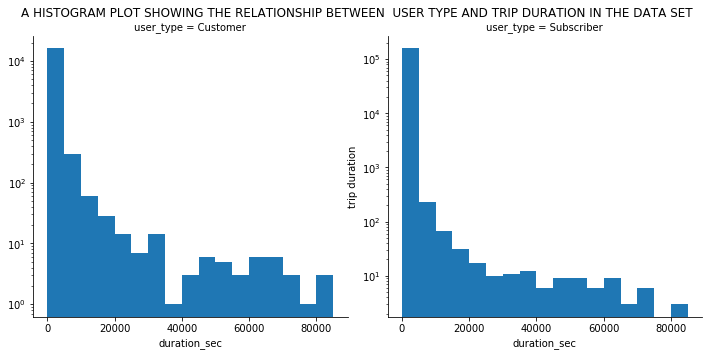

In [58]:
# code to plot a histogram of user type and trip duration
bins = np.arange(0, df['duration_sec'].max()+1000, 5000)
g = sb.FacetGrid(data = df, col = 'user_type',col_wrap=2, sharey=False,size=5)
g.map(plt.hist, 'duration_sec',log=True,bins=bins)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('A HISTOGRAM PLOT SHOWING THE RELATIONSHIP BETWEEN  USER TYPE AND TRIP DURATION IN THE DATA SET')
plt.ylabel('trip duration')

the histogram above shows that the subsciber user type saw a higher trip duration than customer trip duration

In [67]:
# code to create a function that  can plot biivariate categorical variables for the data
def uni_count_plot_2(df,x_var,hue_var,order=None):
    plt.figure(figsize=(10,10))
    sb.countplot(data=df,x=x_var,hue=hue_var,order=order,log=True)
    x_var=x_var.replace('_',' ')
    plt.legend(loc='best',bbox_to_anchor=(1,0.5))
    plt.title(f'''total number of each {x_var}'''.title(),fontsize=14,weight='bold')
    plt.xlabel(x_var.title(),fontsize=14,weight='bold')
    plt.ylabel('total number',fontsize=14,weight='bold')

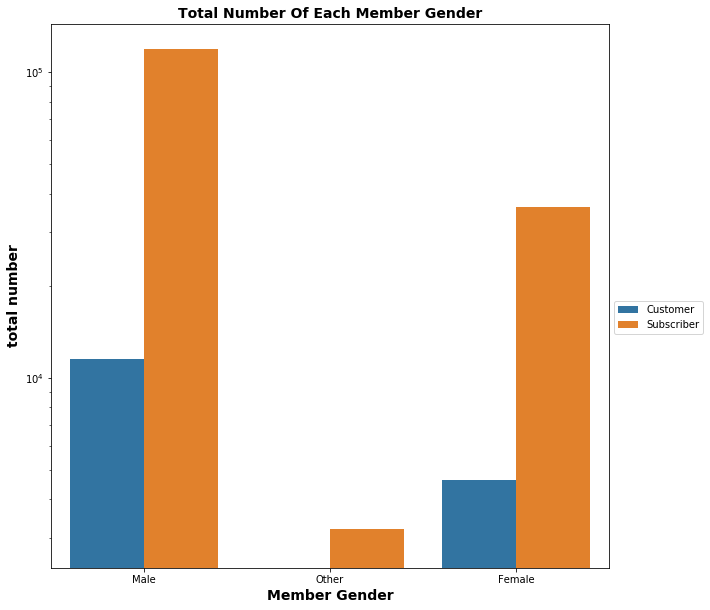

In [68]:
# code to call function
uni_count_plot_2(df,'member_gender','user_type')

the bar graph above shows that there are more male subscribers and customers than female and other gender type

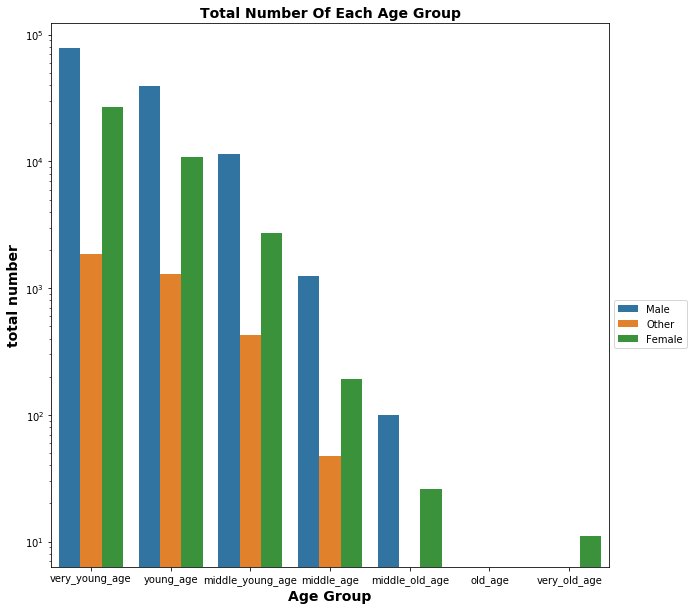

In [70]:
# code to call the function
uni_count_plot_2(df,'age_group','member_gender',interval_order)

the bar plot showing the relationship between age group and gender type, it follows that very young age group ain all gender type was more followwed by young age

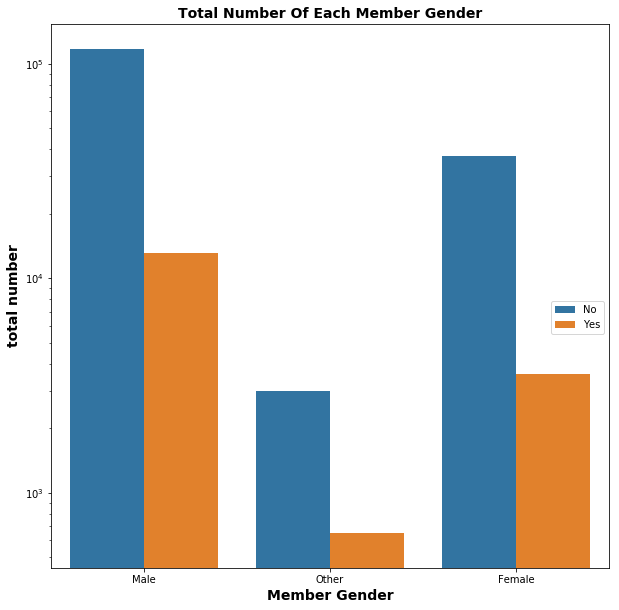

In [73]:
# code to call the function
uni_count_plot_2(df,'member_gender','bike_share_for_all_trip')

the bar chart above shows the relationship between bike trip for all and gender, it shows males saw a high number of trip for all and no trip for all journey

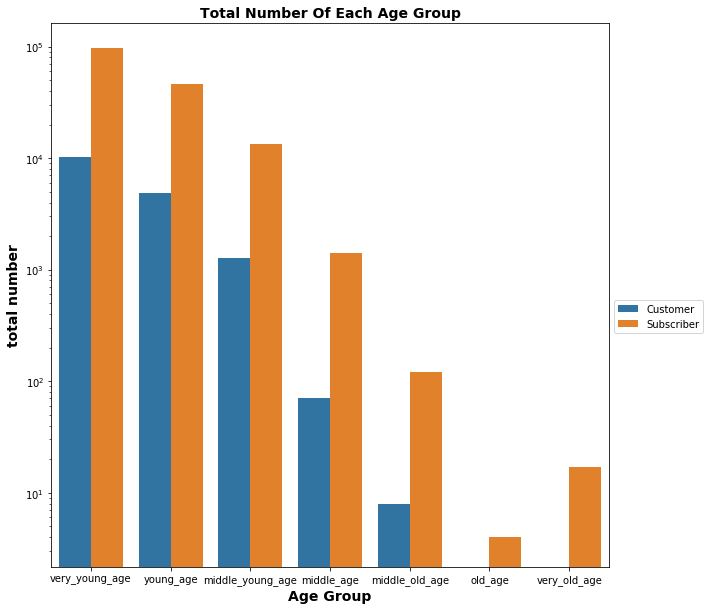

In [75]:
# code to call the function
uni_count_plot_2(df,'age_group','user_type',interval_order)

the result above shows that subscriber user group was high in all age groups

## summary of bivariate exploration
> 1.Trip duration for males were slightly highere than that of females
> 2.low trip duration for subsciber user type was higher than that of customer usertype
> 3.median trip duration was almost the same for the gender type and user type and age group
> 4.1985 to 2001 year group had higher trip duration as compared to the other group
> 5.most of the subsciber usertype were males
> 6.there were more males as compared to females and other gender type between the age year of 1985 to 2001 in the data set
> 7.there were more males than females who didnt use the bike for all journey
> 8.there were more subsciber user type between the ages of 2001 and 1985 than customer user type
> 9.very young age group(age year of 2001 to 1985) did not use the bike for all journey.

> there were no observations made between the other variables of interest

## Multivariate Exploration


Text(0,0.5,'trip duration(seconds)')

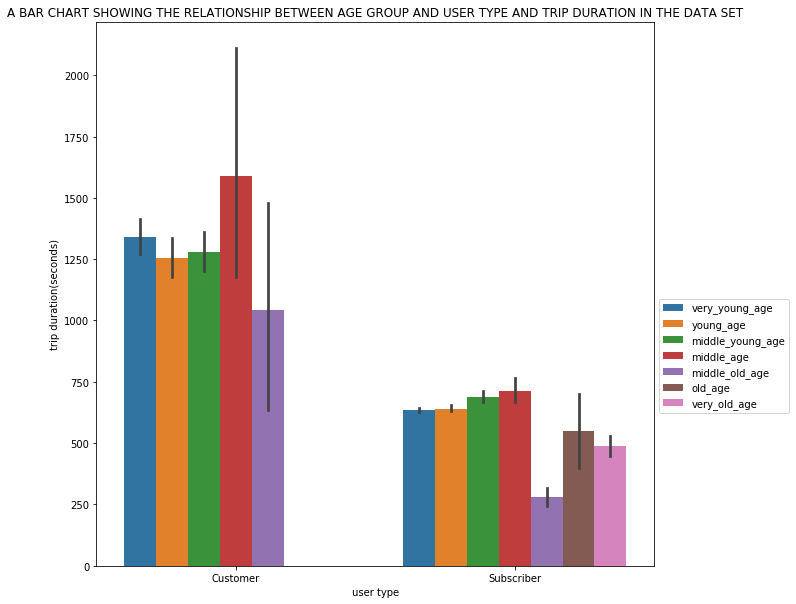

In [76]:
plt.figure(figsize = [10, 10])
ax = sb.barplot(data = df, x = 'user_type', y = 'duration_sec', hue = 'age_group')
ax.legend(loc = 8, ncol = 3, framealpha = 1)
plt.title('A BAR CHART SHOWING THE RELATIONSHIP BETWEEN AGE GROUP AND USER TYPE AND TRIP DURATION IN THE DATA SET')
plt.legend(loc='best',bbox_to_anchor=(1,0.5))
plt.xlabel('user type')
plt.ylabel('trip duration(seconds)')

the plot above shows that customer user type who fall in the middle age group(1940 to1955) had a longer trip duration as compared to suscriber user type

Text(0,0.5,'trip duration(seconds)')

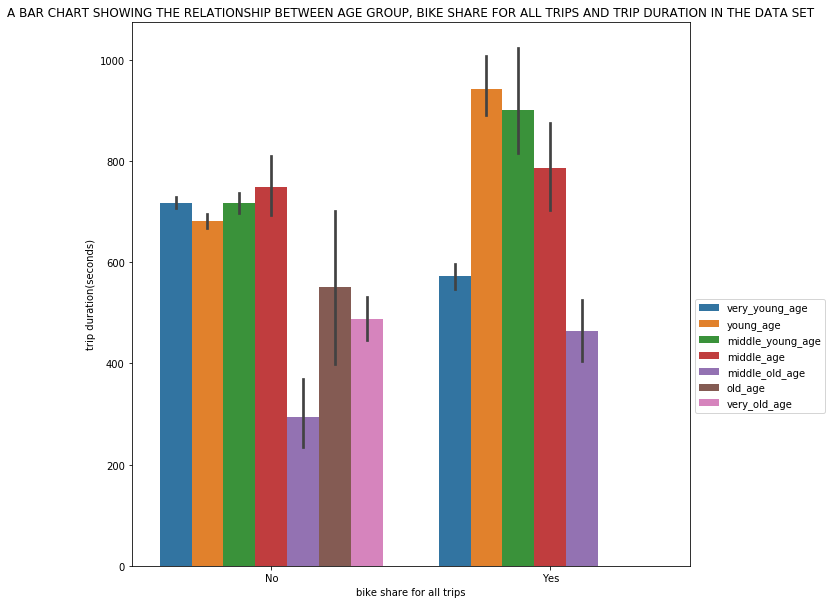

In [77]:
plt.figure(figsize = [10, 10])
ax = sb.barplot(data = df, x = 'bike_share_for_all_trip', y = 'duration_sec', hue = 'age_group')
ax.legend(loc = 8, ncol = 3, framealpha = 1)
plt.title('A BAR CHART SHOWING THE RELATIONSHIP BETWEEN AGE GROUP, BIKE SHARE FOR ALL TRIPS AND TRIP DURATION IN THE DATA SET')
plt.legend(loc='best',bbox_to_anchor=(1,0.5))
plt.xlabel('bike share for all trips')
plt.ylabel('trip duration(seconds)')

the bar graph shows that young age group(1970 to 1985)  whose bike share was for all journey had a high number of trip duration

Text(0,0.5,'trip duration(seconds)')

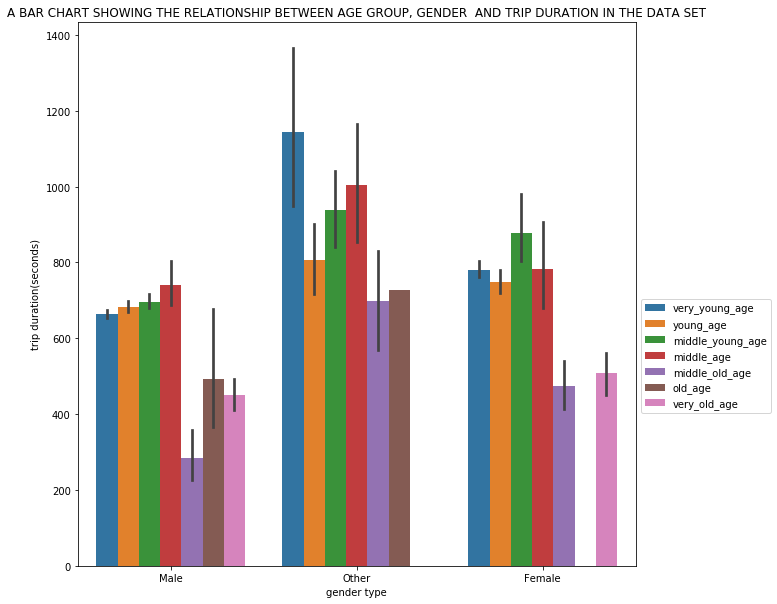

In [78]:
plt.figure(figsize = [10, 10])
ax = sb.barplot(data = df, x = 'member_gender', y = 'duration_sec', hue = 'age_group')
ax.legend(loc = 8, ncol = 3, framealpha = 1)
plt.title('A BAR CHART SHOWING THE RELATIONSHIP BETWEEN AGE GROUP, GENDER  AND TRIP DURATION IN THE DATA SET')
plt.legend(loc='best',bbox_to_anchor=(1,0.5))
plt.xlabel('gender type')
plt.ylabel('trip duration(seconds)')


the graph above shows that other gender group who were between the ages of 2001 and 1985 had a long trip as compare to the other gender group

In [79]:
df.to_csv('df_explain',index=False)

# multivariate summary
> 1.Customer user group who are between the ages of 1940 to 1955(middle age) had longer trip duration as compared to subsciber user type, but bivariate exploration shows subsciber user type had more short trip duration than customer user type.Also there were more subsciber user type between the ages of 2001 and 1985 than customer user type.
> 2. Other gender group between ages of 1985 to 2001(very young age) had longer trip duration followed by female gender group and then male gender group,but bivariate exploration shows males gender type having more short and long trip duration than females.Also there were more males as compared to females and other gender type between the age year of 1985 to 2001 in the data set
> 3. young age group that is birth year from 1970 to 1985 whose bike share was for all journey had a longer trip duration . However,very young age group(age year of 2001 to 1985) saw a high number of people who did not use the bike for all journey

> The multivariate exploration produced surprising results since it did not follow the univariate and bivariate trend

## Conclusions
>My focus was to find out how four categorical variables(user type,gender type trip for all journey and age group) relate to the quantitative variable(trip duration),so i started with the univaraite exploation of the individual univariate categorical variables.After that i explored the the relationship between the categorical variables of interest.Finally i explored how the categorical variables relate to each other and  to the trip duration.There were a lot of insights in the data sights but i focused more was on how the categorical variables relate to long trip duration comparatively. 
>i performed the following cleanup of the data set to enable easy analysis of the data
1.delete null rows since they are very few and has little impact on the analysis.
2.convert member birth year to integer.
3.limit the user birth year to less than 1900(the maximum year is 2001 and minimum year is 1878, its not common for people older than 100 years to ride a bicycle)
4.create a new column(age group) which group the ages of the users into seven categories to enable easy investigation between age group and trip duration. The ages are grouped from very_young_age, middle_young_age,young_age,middle_age,middle_old age,old_age and very_old age which is the increasing order of the ages of the users.
